##  Turnover Dataset

Purpose: build a classifier model to predict customer churn within the next 6 months based on a historical customer behavior data

## Data Description:

**Features:**
- *RowNumber* - The numerical designation of each row.
- *CustomerId* - Unique identifier for each customer.
- *Surname* - Last name of the customer.
- *CreditScore* — The credit score assigned to the customer.
- *Geography* — The country of residence of the customer.
- *Gender* — The gender of the customer.
- *Age* — The age of the customer.
- *Tenure* — The number of years the customer has been a client of the bank.
- *Balance* — The current balance in the customer's account.
- *NumOfProducts* — The number of bank products utilized by the customer.
- *HasCrCard* — A binary indicator of whether the customer possesses a credit card.
- *IsActiveMember* - A flag indicating the customer's activity status.
- *EstimatedSalary* — The estimated salary of the customer.

**Target:**
- *Exited* — A binary indicator representing whether the client has actually left the bank.




The source of the data:  [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## 1. Data Preparation

Importing the libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) # enabling the display of unlimited number of columns
pd.set_option('display.max_rows', None) # enabling the display of unlimited number of rows
pd.options.mode.chained_assignment = None

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

from sklearn.utils import shuffle

from joblib import dump

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

Loading the dataset and checking top 5 rows

In [2]:
data = pd.read_csv('Churn.csv')

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [3]:
# general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# descriptive statistics

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# check for duplicates

data.duplicated().sum()

0

In [6]:
# check for class imbalance - the target variable has an uneven distribution
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

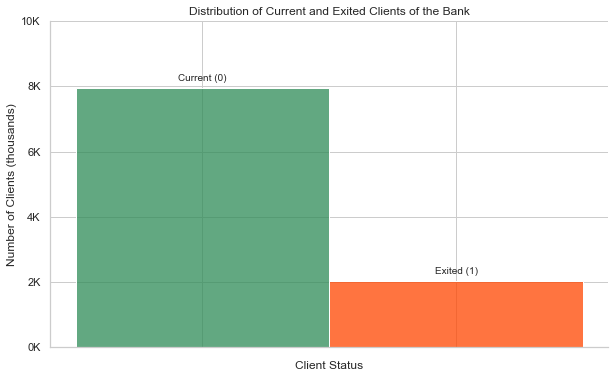

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style
sns.set(style="whitegrid", palette="pastel")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms with specified colors
sns.histplot(data.loc[data['Exited'] == 0, 'Exited'], color='seagreen', label='Current', ax=ax)
sns.histplot(data.loc[data['Exited'] == 1, 'Exited'], color='orangered', label='Exited', ax=ax)

# Set x-ticks for better readability
ax.set_xticks([0, 1])

# Set y-axis limit to 10000
ax.set_ylim(0, 10000)

# Set labels and title
ax.set_xlabel('Client Status')
ax.set_ylabel('Number of Clients (thousands)')
ax.set_title('Distribution of Current and Exited Clients of the Bank')

# Add category names under each bar
bar_width = 0.2
categories = ['Current (0)', 'Exited (1)']
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 200, categories[i], ha='center')

# Format y-tick labels to display "000" as "K" for thousands
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1000))))

# Remove top and right spines for aesthetics
sns.despine()

# Remove numeric x-tick labels
ax.set_xticklabels([])

# Remove legend
ax.legend().set_visible(False)

# Show the plot
plt.show()


In [8]:
# The share of current clients is significantly higher than those that exited and equals to 80% 
len(data[data['Exited'] == 0]) / len(data)

0.7963

Observations:

* The variable Tenure has null data
* The variables Tenure, RowNumber, CustomerID and Surname are not relevant and need to be deleted
* The categorical variables Geography and Gender should be codified as numerical ones
* Target variable has class imbalance (80% - existing customers)
* Encoding of numerical values is required


## Deletion of non-relevant features

In [9]:
data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True) 
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Further exploring features with null values

What's the percentage of Null values in Tenure?

In [10]:
print(data['Tenure'].isna().sum() / len(data) * 100, "%")

9.09 %


We could fill the data with average or median values, delete the rows containing Null values or directly delete the column Tenure. Since the first two options are not optimal - leading to skewing or loss of large amount data, we should check if Tenure is at all relevant for our purposes

First, lets check the correlation of this feature with other variables

In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame
corr = data[['CreditScore',
             'Age',
             'Tenure',
             'Balance',
             'NumOfProducts',
             'HasCrCard',
             'IsActiveMember',
             'EstimatedSalary',
             'Exited']].corr()

# Create a function to apply the background color based on the condition
def highlight_high_corr(val):
    return 'background-color: yellow' if val > 0.5 else ''

# Apply the style with the custom function
styled_corr = corr.style.applymap(highlight_high_corr).background_gradient(cmap='coolwarm')

# Display the styled correlation matrix
styled_corr


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


The correlation matrix shows that there is no correlation between Tenure and the Target variable so it is ok to drop it

In [12]:
data.drop(columns = 'Tenure', axis=1, inplace=True)

## Transforming categorical variables into numeric with One Hot Encoding

We will use One Hot Encoding technique in order to be able to work with all kinds of models, including Logistic Regression

In [13]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0


# Splitting the data into training and testing datasets

We will split the dataframe into 3 parts: training, validation and testing (sezied 60%-30%-20%, respetively).

First, we will split the dataframe in 2 parts using train_test_split:

In [14]:
RANDOM_STATE=12345 # we set a fixed random state value so the same random split is generated every time we run the code

target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

# due to class imbalance in our target variable,we use stratify to ensure that both datasets have similar class distribution

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state = RANDOM_STATE, stratify=target)

# check the split
features_train.shape, features_valid.shape, target_train.shape, target_valid.shape

((6000, 10), (4000, 10), (6000,), (4000,))

Second, we divide validation dataset into validation and testing dataset

In [15]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=RANDOM_STATE, stratify=target_valid)

#проверка корректности разбивки
features_valid.shape, features_test.shape, target_valid.shape, target_test.shape

((2000, 10), (2000, 10), (2000,), (2000,))

## Feature Scaling

We will normalize the numeric features by using StandardScaler() - so each feature contribution to model training is relatively similar

In [16]:
# creating a list of numeric features
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary'] 

scaler = StandardScaler() # creating object StandardScaler()
scaler.fit(features_train[numeric]) # fit it to training data

features_train[numeric] = scaler.transform(features_train[numeric]) # save training data
features_valid[numeric] = scaler.transform(features_valid[numeric]) # save validation data
features_test[numeric] = scaler.transform(features_test[numeric]) # save testing data

In [17]:
# check the results
features_train.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,0.481608,0.820981,0,1,1.422836,0,0,1
660,-0.184996,0.190726,0.088439,-0.914708,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,0.879129,-0.914708,1,0,0.113236,0,0,0


In [18]:
features_train.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2837,-1.040434,0.953312,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,0.481608,0.820981,0,1,1.422836,0,0,1
660,-0.184996,0.190726,0.088439,-0.914708,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,0.879129,-0.914708,1,0,0.113236,0,0,0


In [19]:
features_test.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
657,-0.504497,1.429928,0.873883,0.820981,1,1,1.725255,1,0,0
2083,-1.195031,-1.429769,-1.219673,-0.914708,1,1,1.203665,0,0,1
3234,-1.267176,0.762665,-1.219673,-0.914708,1,0,-1.374743,0,0,1
1551,0.825039,1.239281,-1.219673,0.820981,0,1,0.382306,0,1,0
2344,0.660135,0.953312,0.267087,-0.914708,1,0,-1.613578,1,0,0


## Summmary of data preparation

* Column Tenure deleted due to Null values (9%) and no correlation with target variable
* Non-relevant features deleted - RowNumber, CustomerId, Surname
* Categorical variables (Geography, Gender) transformed into numerical with One Hot Encoding
* Class imbalance in target variable identified
* Dataset split into training (60%), validation (20%) and testing (20%) data taking into account the class imbalance
* Numeric variables normalized with StandardScaler

# 2. Model training and selection

We will train 3 models: DecisionTree, RandomForest and LogisticRegression with standard hyperparameters. 
For each model, we'll calculate F1-score, AUC-ROC and build ROC-curve.

Creating a function that calculates AUC-ROC and builds ROC-curve plot:

In [51]:

def graphic_roc_curve(model, features, target):
    # calculating probabilities of class "1"
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities [:, 1]
    
    # save data to build the plot
    fpr, tpr, thresholds = roc_curve(target, probabilities_one)
  
    # creating ROC-curve according to the model
    plt.figure()
    plt.plot(fpr, tpr, label='ROC Curve')
    
    # ROC-curve of random model
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
   
    # set axes limits between 0 and 1
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    # naming the axes
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # plot title
    plt.title('ROC-curve')
    
    plt.legend()
    plt.show()
    
    
    # calculating ROC-AUC value
    print('ROC-AUC = ', roc_auc_score(target, probabilities_one))

## Logistic Regression

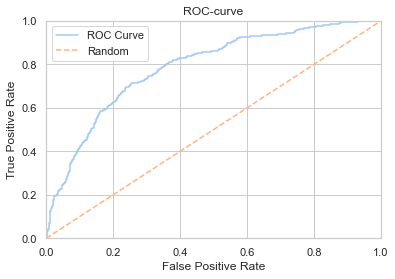

ROC-AUC =  0.7873235663612179
F1-score = 0.3169398907103825


In [52]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

# расчет AUC-ROC и построение ROC-кривой
graphic_roc_curve(model, features_valid, target_valid)

# calculating F1
print('F1-score =', f1_score(target_valid, predictions_valid))


## Decision Tree

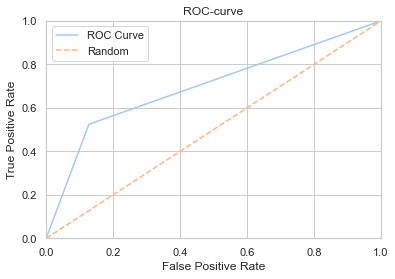

ROC-AUC =  0.6984986205537491
F1-мера = 0.5187878787878788


In [22]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

# расчет AUC-ROC и построение ROC-кривой
graphic_roc_curve(model, features_valid, target_valid)

# расчет F1
print('F1-мера =', f1_score(target_valid, predictions_valid))

## Random Forest

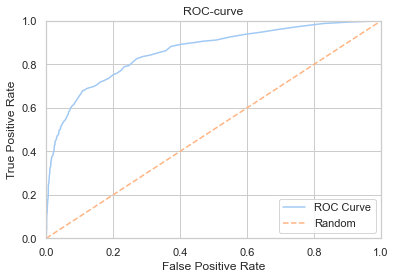

ROC-AUC =  0.8601086006010444
F1-мера = 0.60932944606414


In [23]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

# расчет AUC-ROC и построение ROC-кривой
graphic_roc_curve(model, features_valid, target_valid)

# расчет F1
print('F1-мера =', f1_score(target_valid, predictions_valid))

#### Conclusions

Out of 3 models, RandomForest demostrated best metrics results: ROC-AUC = 0.86, F1= 0.61.
However, we need to perform hyperparameter tuning on RandomForest to try further improve the model

## Hyperparameters Tuning

We will try to find best hyperparameters for this model using for in loop, focusing on:
- n_estimators - the number of "trees" in the "forest"
- max_depth - maximum depth of 1 tree

We will print the best model and its F1 score

In [24]:
%%time

best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 151, 10): # перебираем количество деревьев от 10 до 150 с шагом 10
    for depth in range (1, 21, 2): # перебираем глубину деревьев от 1 до 20 с шагом 2
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, n_jobs=-1) # создаем модель
        model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
        predictions_valid = model.predict(features_valid) # предсказываем результат на валидационной выборке
        f1_result = f1_score(target_valid, predictions_valid) # считаем F1-меру на валидационной выборке
        if f1_result > best_result:
            best_model = model # сохраняем наилучшую модель
            best_result = f1_result #  сохранияем наилучшее значение F1-меры на валидационных данных
            best_est = est # сохраняем наилучшее значение гиперпараметра n_estimators
            best_depth = depth # сохраняем наилучшее значение гиперпараметра max_depth
            
print('Best model:', best_model)
print('F1-score of the best model for validation sample:', best_result)

Best model: RandomForestClassifier(max_depth=13, n_estimators=60, n_jobs=-1,
                       random_state=12345)
F1-score of the best model for validation sample: 0.6275659824046922
CPU times: total: 6.44 s
Wall time: 23.1 s


Now we will save this model as "best_model" and calculate ROC-AUC and build the curve 

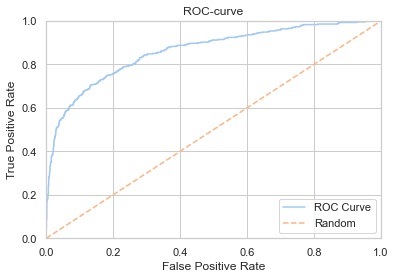

ROC-AUC =  0.8613379396984925


In [25]:
best_model = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=13, n_jobs=-1)
best_model.fit(features_train, target_train)
predictions_valid = best_model.predict(features_valid)
graphic_roc_curve(best_model, features_valid, target_valid)

Hyperparameters tuning helped us to improve F1-score. With hyperparameters set as max_depth=13, n_estimators=60, n_jobs=-1, random_state=12345 RandomForest F1=0.63 (vs 0.61) and ROC-AUC = 0.86 (the increase is not visible after the rounding)

# Dealing with class imbalance

To deal with class imbalance we will use 3 methods and choose the best one:
- reduce the selection
- increase the selection
- changing the threashold

## Upsampling

We will increase the selection using upsampling which includes the following steps:
- divide the training sample into negative and positive
- create several copy of the positives
- create a training sample with that data
- shuffle the data

In [27]:
# lets create a function that receives features, target and a number of repeated positive objects as an input:

def upsample(features, target, repeat):
    # diving the sample into positives and negatives
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # multiplying the positives and adding them to the negative objects
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # shuffling the data
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled 

# using the function on training data
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# check the size of the tranformed training dataset
print(features_upsampled.shape)
print(target_upsampled.shape)

(9666, 10)
(9666,)


In [28]:
# checking the number of positive and negative objects in the tranformed target:
target_upsampled.value_counts()

1    4888
0    4778
Name: Exited, dtype: int64

Now the number of positive and negative objects is balanced. However, we need to tune hyperparameters again on this new training dataset

In [29]:
%%time

best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 151, 10): # trying the model with tree number between 10 and 151 with the step size of 10
    for depth in range (1, 21, 2): # trying tree depth between 1 and 20, with step size 2
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, n_jobs=-1) # creating the model
        model.fit(features_upsampled, target_upsampled) # training the model with upsampled dataset
        predictions_valid = model.predict(features_valid) # predicting using the validation dataset
        f1_result = f1_score(target_valid, predictions_valid) # calculating the F1-measure on validation dataset
        if f1_result > best_result:
            best_model = model # saving the best model
            best_result = f1_result #  saving the best F1-score
            best_est = est # saving the best value of hyperparameter n_estimators
            best_depth = depth # сsaving the best value of hyperparameter max_depth
            
print('Best model:', best_model)
print('F1-score of the best model in the validation selection:', best_result)

Best model: RandomForestClassifier(max_depth=9, n_estimators=40, n_jobs=-1,
                       random_state=12345)
F1-score of the best model in the validation selection: 0.6470588235294118
CPU times: total: 10.3 s
Wall time: 27.2 s


F1-score increased to 0.63. We will save this model as model_upsampled

In [30]:
model_upsampled = RandomForestClassifier(max_depth=9, n_estimators=40, n_jobs=-1, random_state=12345)
model_upsampled.fit(features_upsampled, target_upsampled)
predicted_valid = model_upsampled.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6470588235294118


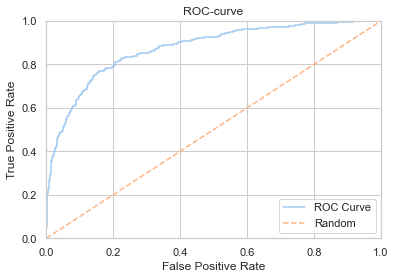

ROC-AUC =  0.873392698788058


In [31]:
graphic_roc_curve(model_upsampled, features_valid, target_valid)

## Downsampling

- we will divide the dataframe into negative and positive objects
- randomly discard a part of negative objects
- create a training selection with this data
- shuffle the obtained dataset

In [32]:
# creating a function that receives feature, target and the proportion of negative objects that need to be discarded
def downsample(features, target, fraction):
    # dividing the selection into positive and negative
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # reducing the share of negatives and uniting them with the positives
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    # shuffling the data
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

# call the function for the training dataset
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

# checking the size of the downsampled dataset
print(features_downsampled.shape)
print(target_downsampled.shape)

(2464, 10)
(2464,)


In [33]:
#checking for class disbalance in target variable
target_downsampled.value_counts()

0    1242
1    1222
Name: Exited, dtype: int64

Now the class imbalance is corrected; we need to find best values for hyperparameters using the downsampled dataset

In [34]:
%%time

best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 151, 10):  # trying the model with tree number between 10 and 151 with the step size of 10
    for depth in range (1, 21, 2): # trying tree depth between 1 and 20, with step size 2
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, n_jobs=-1) # creating the model
        model.fit(features_downsampled, target_downsampled) # training the model
        predictions_valid = model.predict(features_valid) # predicting using validation dataset
        f1_result = f1_score(target_valid, predictions_valid) # calculating F1 scores
        if f1_result > best_result:
            best_model = model # saving the best model
            best_result = f1_result #  saving the best F1-score
            best_est = est # saving the best value of n_estimators
            best_depth = depth # saving the best value of max_depth
            
print('Best model:', best_model)
print('F1-score of the best model:', best_result)

Best model: RandomForestClassifier(max_depth=7, n_estimators=130, n_jobs=-1,
                       random_state=12345)
F1-score of the best model: 0.6373411534701857
CPU times: total: 4.31 s
Wall time: 19.4 s


Now we will train the model with the best hyperparameters on downsampled dataset and calculate the values of the metrics

In [35]:
model_downsampled = RandomForestClassifier(max_depth=7, n_estimators=130, n_jobs=-1, random_state=12345)
model_downsampled.fit(features_downsampled, target_downsampled)
predicted_valid = model_downsampled.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6373411534701857


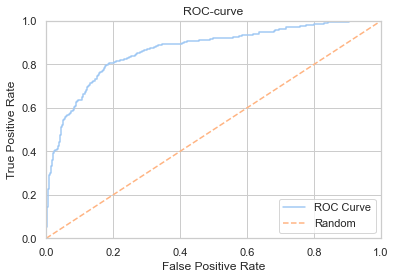

ROC-AUC =  0.8674222829835451


In [36]:
# calculating ROC-AUC and building the curve
graphic_roc_curve(model_downsampled, features_valid, target_valid)

### Conclusions:
- Downsampling gave us a better result than the one before addressing the imbalance; however, the upsampling method did it a bit better

## Changing the classification threshold

We will create a loop that will test threashold between 0 and 0.7 with step size 0.2 and compare F1-scores of each threashold value:

In [37]:
best_model.fit(features_train, target_train) #training the model

#calculating the probability of positives
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

#creating variables to save F1 and threashold results
best_f1=0
threshold_best_f1=0

# trying different threasholds
for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold # comparing probability values with 0.7 threashold and saveing the results
    f1 = f1_score(target_valid, predicted_valid) # calculating F1
    print(f'Threashold = {threshold:.2f} | F1 = {f1:.4f}') 
    # saving best F1 and threashold
    if f1 > best_f1:
        best_f1 = f1
        threshold_best_f1 = threshold
print()
print(f'Best F1 = {best_f1:.4f} | Best threashold = {threshold_best_f1:.2f}')

Threashold = 0.00 | F1 = 0.3389
Threashold = 0.02 | F1 = 0.3389
Threashold = 0.04 | F1 = 0.3577
Threashold = 0.06 | F1 = 0.3927
Threashold = 0.08 | F1 = 0.4213
Threashold = 0.10 | F1 = 0.4553
Threashold = 0.12 | F1 = 0.4843
Threashold = 0.14 | F1 = 0.5369
Threashold = 0.16 | F1 = 0.5867
Threashold = 0.18 | F1 = 0.6090
Threashold = 0.20 | F1 = 0.6282
Threashold = 0.22 | F1 = 0.6321
Threashold = 0.24 | F1 = 0.6424
Threashold = 0.26 | F1 = 0.6483
Threashold = 0.28 | F1 = 0.6404
Threashold = 0.30 | F1 = 0.6476
Threashold = 0.32 | F1 = 0.6407
Threashold = 0.34 | F1 = 0.6319
Threashold = 0.36 | F1 = 0.6319
Threashold = 0.38 | F1 = 0.6240
Threashold = 0.40 | F1 = 0.6184
Threashold = 0.42 | F1 = 0.6053
Threashold = 0.44 | F1 = 0.5952
Threashold = 0.46 | F1 = 0.5865
Threashold = 0.48 | F1 = 0.5789
Threashold = 0.50 | F1 = 0.5781
Threashold = 0.52 | F1 = 0.5678
Threashold = 0.54 | F1 = 0.5546
Threashold = 0.56 | F1 = 0.5397
Threashold = 0.58 | F1 = 0.5302
Threashold = 0.60 | F1 = 0.5213
Threasho

Maximum F1 (0.64) was obtained with the threashold - 0.26; Now is let's find the optimal hyperparameters for this threashold

In [38]:
%%time

threshold = 0.26
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 151, 10):
    for depth in range (1, 21, 2): 
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, n_jobs=-1)
        model.fit(features_train, target_train)
        probabilities= model.predict_proba(features_valid)
        predicted_valid = probabilities [:,1] >= threshold
        f1_result = f1_score(target_valid, predicted_valid) 
        if f1_result > best_result:
            best_model = model
            best_result = f1_result 
            best_est = est
            best_depth = depth 
            
print('Best model:', best_model)
print('F1-score of the best model:', best_result)

Best model: RandomForestClassifier(max_depth=9, n_estimators=40, n_jobs=-1,
                       random_state=12345)
F1-score of the best model: 0.6563876651982379
CPU times: total: 9.17 s
Wall time: 22.5 s


In [41]:
threshold = 0.26
model_threshold = RandomForestClassifier(max_depth=9, n_estimators=40, n_jobs=-1, random_state=12345)
model_threshold.fit(features_train, target_train)
probabilities = model_threshold.predict_proba(features_valid)
predicted_valid = probabilities [:,1] >= threshold

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6563876651982379


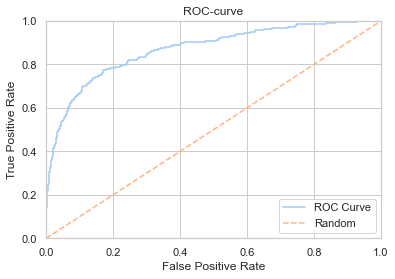

ROC-AUC =  0.8690803896935658


In [40]:
graphic_roc_curve(model_threshold, features_valid, target_valid)

### Conclusion: 

All three techniques improved F1 score on validation dataset. However, upsampling resulted to be the best one, so now we will continue working with RandomForest having max_depth=9, n_estimators=40, n_jobs=-1, random_state=12345

score_data = {'F1':[0.84, 0.83, 0.90], 'Accuracy':[0.75, 0.73, 0.84]}   
score_data = pd.DataFrame(score_data, index =['Логистическая регрессия', 'Случайный лес', 'LGBM']) 

# Testing the model

Now we will run the model with the chosen parameters on testing selection  and check the final metrics

In [56]:
predicted_test = model_upsampled.predict(features_test)

print("F1 =", f1_score(target_test, predicted_test))
print("Confusion Matrix = ")
print(confusion_matrix(target_test, predicted_test))

F1 = 0.6030042918454936
Confusion Matrix = 
[[1349  244]
 [ 126  281]]


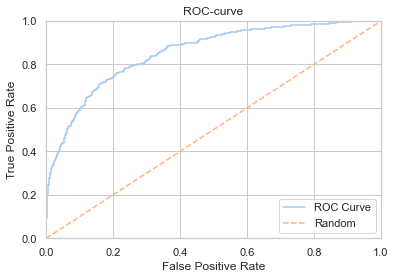

ROC-AUC =  0.8545109053583628


In [57]:
graphic_roc_curve(model_upsampled, features_test, target_test)